# Module 8 Exercise - Data Storytelling

In this exercise, you will create a narrative visualization with a data set of your choosing. **You can choose any data set** you can find on the interner or a data set related to your current line of work. You will create visualizations to give a message, make a point, or convince your audience by using all the techniques we have seen throughout the course. 

Here is a list of your tasks:

1. Find a data set and upload it to your exercises folder in module 8. 
2. Write your R scripts in this exercise notebook to create your visualizations and save them under exercises folder.
3. Create a narrative visualization document using any software you want (Word, PowerPoint, Photoshop, etc.) by pasting your visualizations and creating all necessary elements (captions, text annotations, layout, etc.) 
4. Save your end product as a pdf file and upload it to your exercises folder (name it *L8_Exercise.pdf*)

Make sure that you **start with a clear message** in mind and filter and format your data accordingly, and create the visualizations that will support that message. 

You need to have at least one **major** visualization, and a number of supporting smaller graphs (2, 3, or more), and a clear layout, and enough text annotations and captions to make your message clear. You can choose any type of visualization that you believe will be most **effective** for the type of data and the message you have chosen. 

In [1]:
# this is how you save a plot to a file
library(ggplot2)

#comment this out to see the plot in the notebook 
png(filename="myplot.png")

# your plot here..
qplot(carat, price, data = diamonds)

# comment this out to see the plot in the notebook
dev.off()

png 
  2

Make sure you have all axis labels set in R notebook before you save your plot. You can adjust width and height when saving your plots.  Here is a reference to png() function:
https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html

Happiness! Isn't it what we all aim for.Where is it?

In [2]:
# Read your data here; clean it up, reformat it, filter it, sort it, group it, etc.
library(ggplot2)
data= read.table("Happiness.2016.csv",sep=',',header=TRUE)


In [3]:
head(data)

Country,Region,Happiness.Rank,Happiness.Score,Lower.Confidence.Interval,Upper.Confidence.Interval,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Trust..Government.Corruption.,Generosity,Dystopia.Residual
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485


In [4]:
str(data)

'data.frame':	157 obs. of  13 variables:
 $ Country                      : Factor w/ 157 levels "Afghanistan",..: 38 135 58 104 45 26 98 99 7 134 ...
 $ Region                       : Factor w/ 10 levels "Australia and New Zealand",..: 10 10 10 10 10 6 10 1 1 10 ...
 $ Happiness.Rank               : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Happiness.Score              : num  7.53 7.51 7.5 7.5 7.41 ...
 $ Lower.Confidence.Interval    : num  7.46 7.43 7.33 7.42 7.35 ...
 $ Upper.Confidence.Interval    : num  7.59 7.59 7.67 7.58 7.47 ...
 $ Economy..GDP.per.Capita.     : num  1.44 1.53 1.43 1.58 1.41 ...
 $ Family                       : num  1.16 1.15 1.18 1.13 1.13 ...
 $ Health..Life.Expectancy.     : num  0.795 0.863 0.867 0.796 0.811 ...
 $ Freedom                      : num  0.579 0.586 0.566 0.596 0.571 ...
 $ Trust..Government.Corruption.: num  0.445 0.412 0.15 0.358 0.41 ...
 $ Generosity                   : num  0.362 0.281 0.477 0.379 0.255 ...
 $ Dystopia.Residual            : num  2.

In [5]:
library(plyr)
data=rename(data,c("Health..Life.Expectancy." = "LifeExpectancy","Trust..Government.Corruption." = "Trust","Economy..GDP.per.Capita."="GDPCapita"))


In [6]:
is.null(data)

[1] FALSE

png 
  2

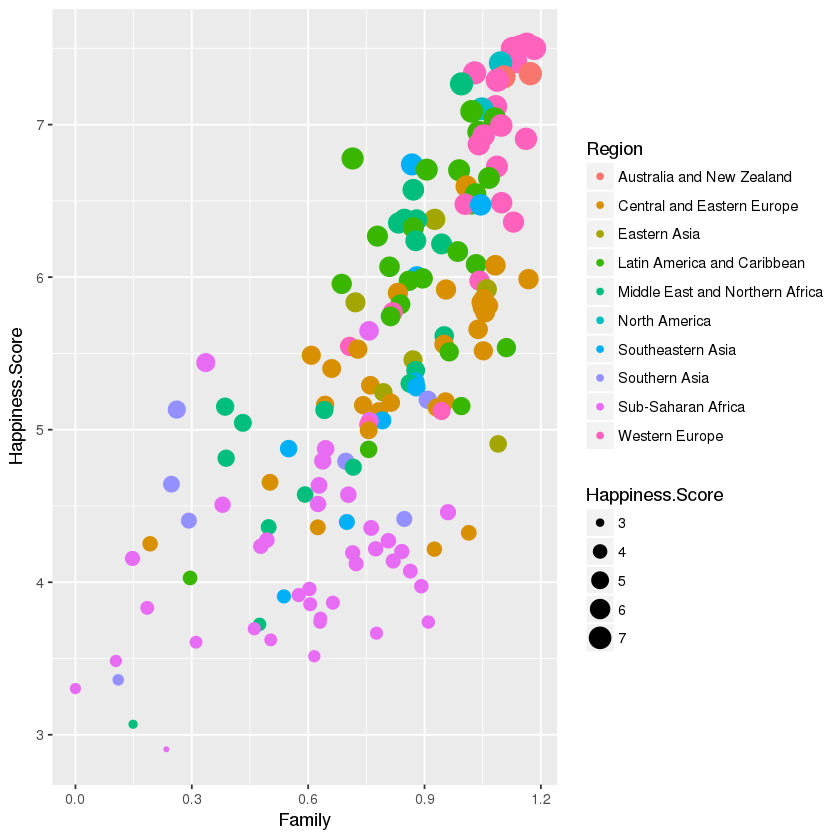

In [10]:
ggplot(data, aes(x=Family, y=Happiness.Score, color=Region)) + geom_point(aes(size=Happiness.Score))
png(filename="myplot1.png")

dev.off()


We can easily see that there is a concentration of pink dots on the upper hand corner of our plots representing western europe.And they do enjoy high happinesss scores here represented in both size of the dots and as a y-axis as well.

png 
  2

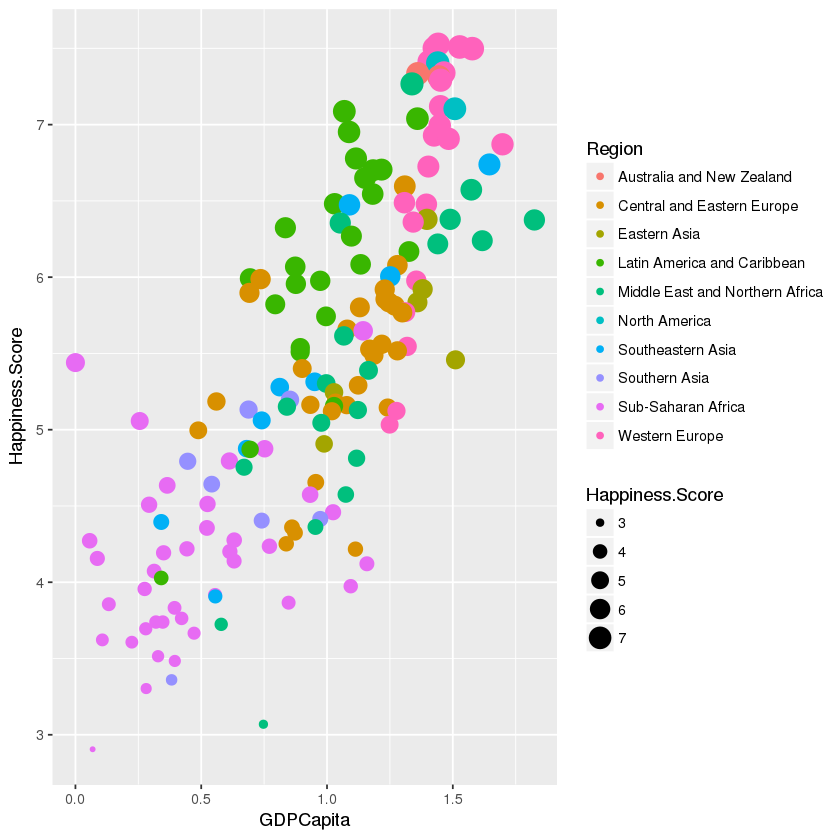

In [11]:
ggplot(data, aes(y=Happiness.Score, x=GDPCapita,color=Region)) + geom_point(aes(size=Happiness.Score))
png(filename='myplot2.png')
dev.off()

Again a particular color,pink seems to be at the upper left hand corner of the plot.Western Europe again is dominating both in term of happiness score but also in GDP per capita.
Next let's use ggcorr to find the correlation between happiness score and the rest of the variables in the data and the extend to which they are correlated.


Warning message:
“Ignoring unknown aesthetics: show_guide”

png 
  2

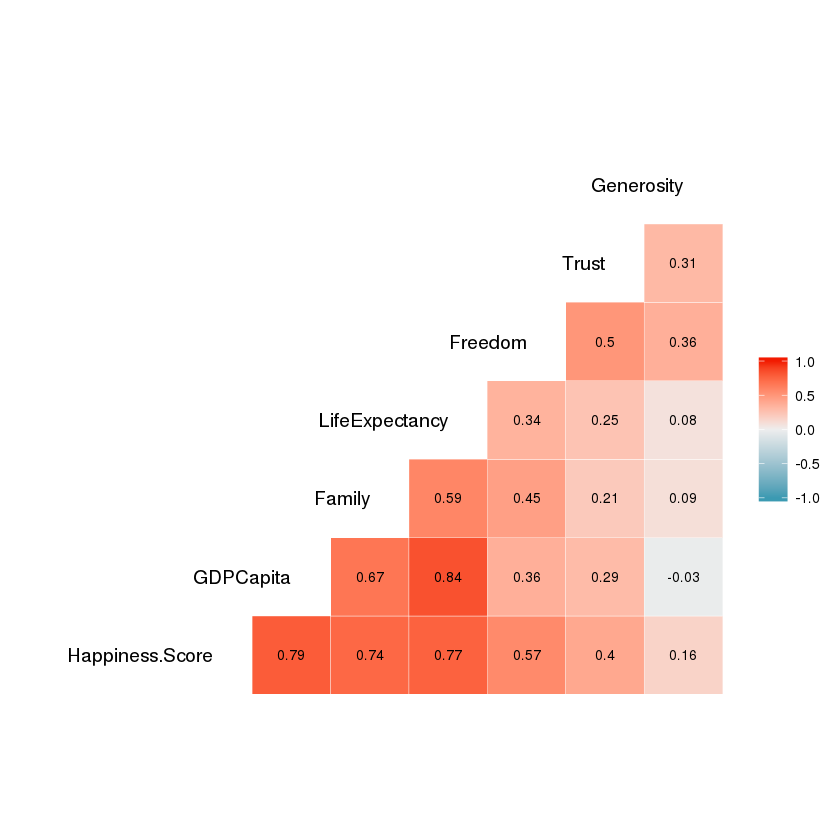

In [12]:
library(GGally)
corr_plot<-ggcorr(data[,c(4,7,8,9,10,11,12)],label=TRUE, label_size=3, label_round=2,label_alpha=1,hjust=1,
                 size=4,layout.exp=2)
corr_plot
png(filename='myplot3.png')
dev.off()

We can definitely observe that Happiness.Score is highly correlated with GDP per capita(.79),Family(.74),Life expectancy(.77),Freedom(.57),Trust(.4) and finally Generosity with 0.16 correlation coefficient.As we can see from the two plots showcasing the most correlated variable and the third most correlated variable with happiness score.And in both plots a particular region seems to be at the upper right hand corner.Western Europe.


In [13]:
library(ggmap)
lonlat<-geocode(as.character(data$Country))
data<-cbind(data,lonlat)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Denmark&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Switzerland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Iceland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Norway&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Finland&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Canada&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Netherlands&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=New%20Zealand&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Australia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?addre

In [14]:
head(data)

Country,Region,Happiness.Rank,Happiness.Score,Lower.Confidence.Interval,Upper.Confidence.Interval,GDPCapita,Family,LifeExpectancy,Freedom,Trust,Generosity,Dystopia.Residual,lon,lat
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,9.501785,56.26392
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,8.227512,46.81819
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,-19.020835,64.96305
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,8.468946,60.47202
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,25.748151,61.92411
Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,-106.346771,56.13037



Attaching package: ‘maps’

The following object is masked from ‘package:plyr’:

    ozone

Warning message:
“Ignoring unknown aesthetics: x, y”

png 
  2

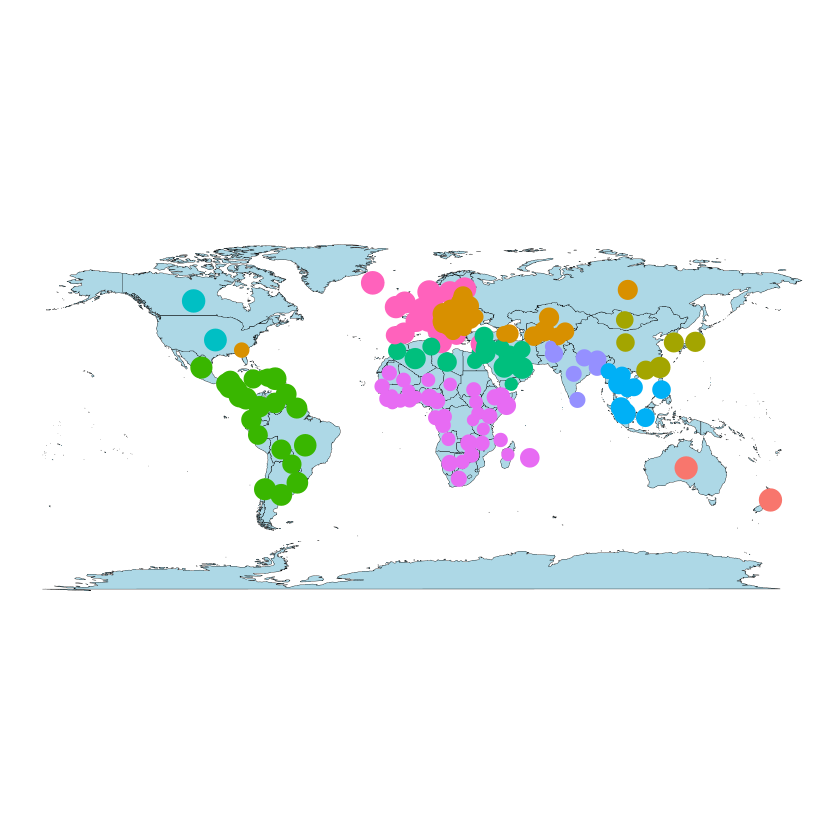

In [15]:
#Lest's vizualize the 
library(maps)
library(ggmap)
library(mapproj)
world <- map_data("world")
ggplot() + 
geom_map(data = world,map = world, aes(long,lat, map_id= region),color="black", fill="lightblue",size=.1)+ 
theme_void()+
coord_equal()+
geom_point(data=data,aes(x=lon, y=lat,size=Happiness.Score,color=factor(Region)))+
theme(legend.position="none")
png(filename='myplot3.png')
dev.off()

This map depicts a dense concentration of bigger pink dots than any other region.Those points represent western europe.

png 
  2

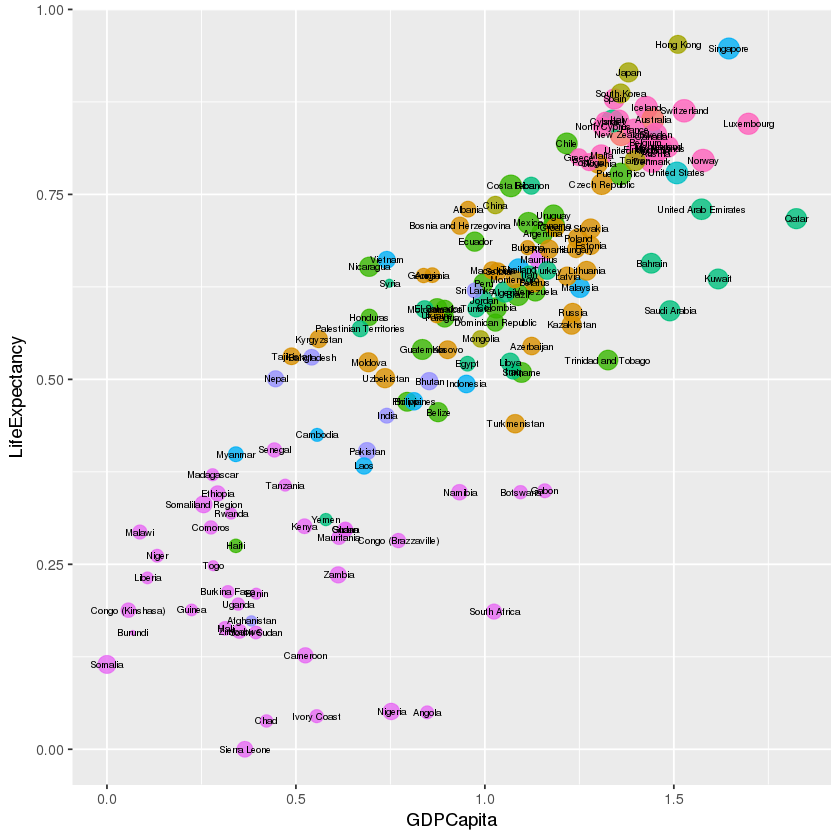

In [16]:
ggplot(data, aes(x=GDPCapita, y=LifeExpectancy,size=Happiness.Score)) + geom_point(aes(colour=Region),alpha=0.8)+
geom_text(size=2, aes(label=Country)) +
xlab("GDPCapita") + ylab("LifeExpectancy") +  
theme(legend.position="none")
png(filename='myplot4.png')
dev.off()

On life expectancy (health) except for a few countries in two regions.
Western europe is the most represented region in the upper rigth hand corner of the graph meaning
high life expectancy and high gdp per capita.Despite not scoring the highest possible life expectancies western european countries are more than any other countries in a given region.    

In [17]:
#Since the data is already sorted the highest countries with the highest happiness score are on top of our table and the 
#the ones with the least are on the bottom.
h=head(data)
t=tail(data)
data1=rbind(h,t)

I will display the 5 countries with the highest and the five with the least happiness scores.

png 
  2

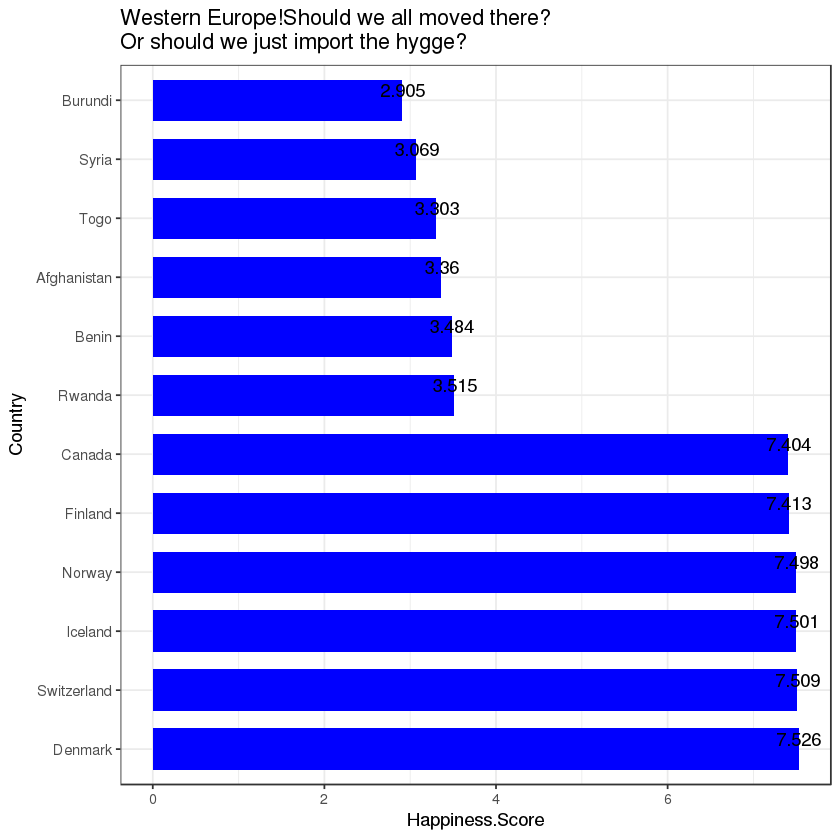

In [19]:
ggplot(data1, aes(x=reorder(Country,-Happiness.Score),Happiness.Score)) + 
geom_bar(fill="blue",stat='identity',width=.7)+
geom_text(aes(label=Happiness.Score), position=position_dodge(width=0.9),vjust=-0.25)+
coord_flip() + theme_bw() + xlab("Country") +
theme(legend.position="left")+
ggtitle("Western Europe!Should we all moved there?
Or should we just import the hygge?") 
png(filename='myplot5.png')
dev.off()